In [ ]:
# Bo warning
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os
import sys

sys.path.append('/content/drive/MyDrive/AI/[CODE] image_retrieval')

In [ ]:
%cd /content/drive/MyDrive/AI/[CODE] image_retrieval

/content/drive/MyDrive/AI/[CODE] image_retrieval


In [ ]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path, # read images from path
    folder_to_images # doc het anh tu folder
)
from feature_extractor import FeatureExtractor

(dtype('float32'), (224, 224, 3))

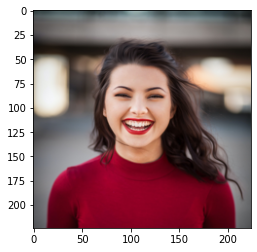

In [ ]:
query_path = "big_smile_high.jpg"
size = (224, 224)
query = read_image_from_path(query_path, size)
plt.imshow(query/255.0);
query.dtype, query.shape

In [ ]:
class similarities_measure:
      def __init__(self,query,database):
          self.query = query
          self.X     = database

      def absolute_difference(self):
          axis_batch_size = tuple(range(1,len(self.X.shape)))
          return np.sum(np.abs(self.X - self.query), axis=axis_batch_size)
      
      def mean_square_difference(self):
          axis_batch_size = tuple(range(1,len(self.X.shape)))
          return np.mean((self.X - self.query)**2, axis=axis_batch_size)

      def cosine_similarity(self):
          axis_batch_size = tuple(range(1,len(self.X.shape)))
          # Ứng dụng norm
          query_norm = np.sqrt(np.sum(self.query**2))
          X_norm = np.sqrt(np.sum(self.X**2, axis=axis_batch_size))
          return np.sum(self.X * self.query, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)
     
      def correlation_coefficient(self):
    
          axis_batch_size = tuple(range(1,len(self.X.shape)))
          
          # Ứng dụng mean
          query_mean = self.query - np.mean(self.query)
          X_mean = self.X - np.mean(self.X, axis=axis_batch_size, keepdims=True)
          
          # Ứng dụng norm
          query_norm = np.sqrt(np.sum(query_mean**2))
          X_norm = np.sqrt(np.sum(X_mean**2, axis=axis_batch_size))
          
          return np.sum(X_mean * query_mean, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)
                
            

In [ ]:
method_list = [attribute for attribute in dir(similarities_measure) if callable(getattr(similarities_measure, attribute)) and attribute.startswith('__') is False]
print(method_list)


['absolute_difference', 'correlation_coefficient', 'cosine_similarity', 'mean_square_difference']


In [ ]:
similarities_measure = [absolute_difference, mean_square_difference, cosine_similarity, correlation_coefficient]

In [ ]:
class Dataset:
    def __init__(self,path):
        self.root_fearure_path = path
        self.data = np.load(self.root_fearure_path)
    def constructor(self):
        paths_feature = self.data["array1"]
        imgs_feature = self.data["array2"]
        return paths_feature,imgs_feature
paths_feature,imgs_feature = Dataset("feature/all_feartures.npz").constructor()
fe = FeatureExtractor()

In [ ]:
query_path = "big_smile_high.jpg"
size = (224, 224)
query = read_image_from_path(query_path, size)
plt.imshow(query/255.0);
print(query)


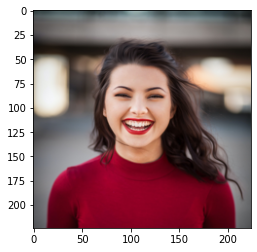

In [ ]:
query_path = "big_smile_high.jpg"
size = (224, 224)
query = read_image_from_path(query_path, size)
plt.imshow(query/255.0);


def model(select=1):
    %%time
    ls_path_score = []
    # trichs xuat anh query thanh vector
    query_vector = fe.extract(query[None, :]) 
    if  select==1:
        print("result of method CNN+AD")
        rates = similarities_measure(query_vector, imgs_feature).absolute_difference()
        
    if  select==2:
        print("result of method CNN+MSD")
        rates = similarities_measure(query_vector, imgs_feature).mean_square_difference()
       
    if select==3:
        print("result of method CNN+CS")
        rates = similarities_measure(query_vector, imgs_feature).cosine_similarity()
      
        
    if select==4:
        print("result of method CNN+CC")
        rates = similarities_measure(query_vector, imgs_feature).correlation_coefficient()
        
      
    ls_path_score = list(zip(paths_feature, rates))
    fig = plt.figure(figsize=(15, 15))
    columns = 5
    rows = 6
    for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1],reverse=(select>2))[:30], 1):
        img = np.random.randint(10, size=(10,10))
        fig.add_subplot(rows, columns, i)
        plt.imshow(plt.imread(path[0]))
        plt.axis("off")
        plt.show()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
result of method CNN+CS


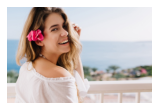

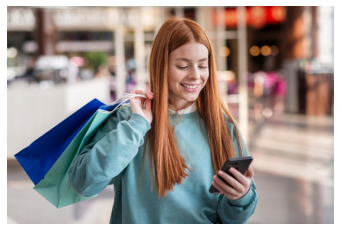

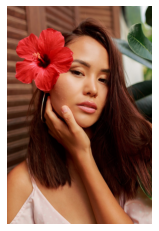

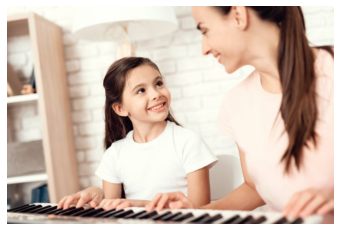

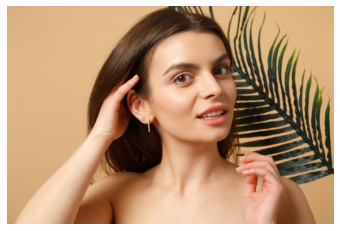

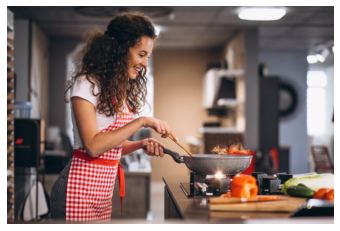

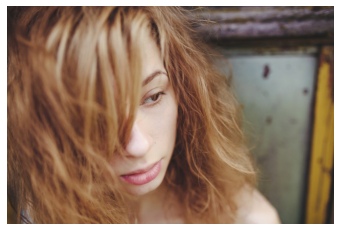

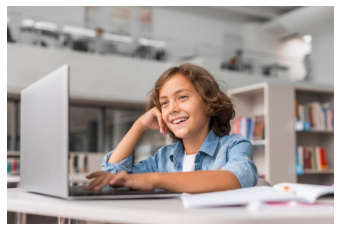

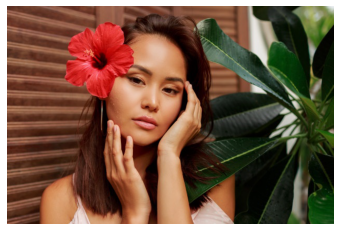

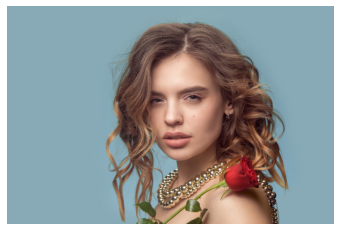

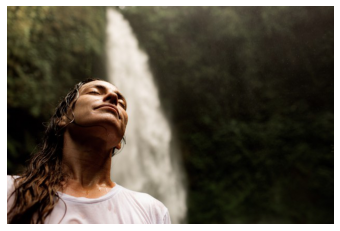

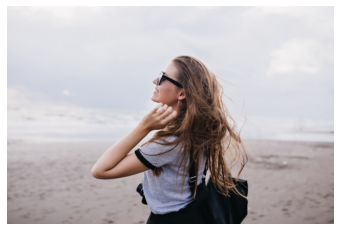

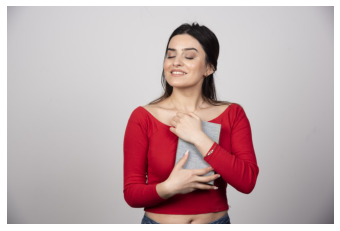

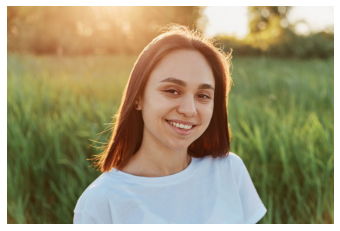

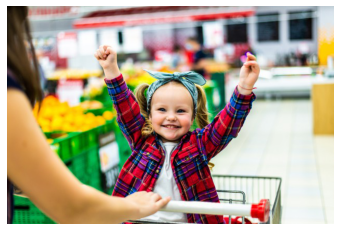

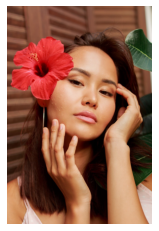

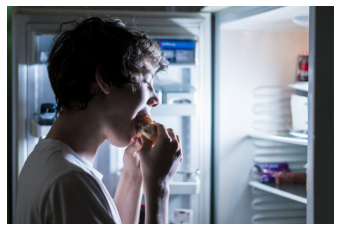

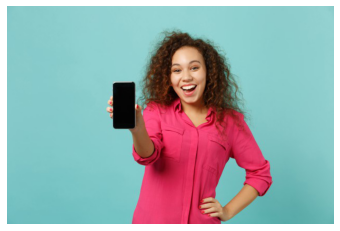

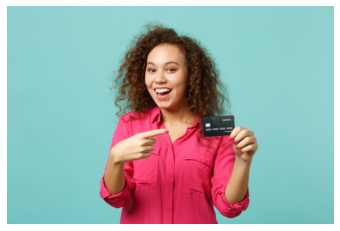

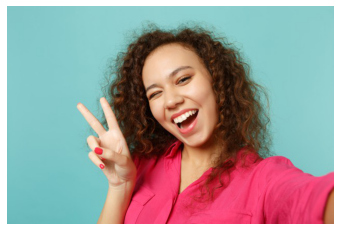

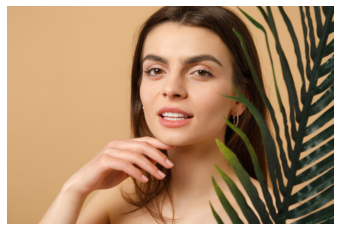

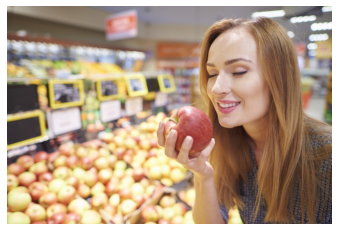

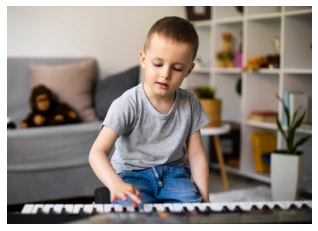

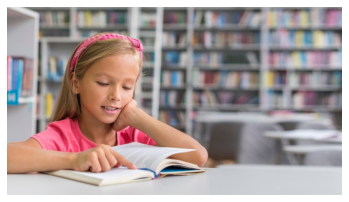

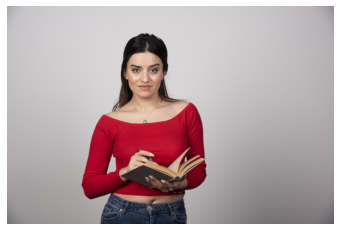

In [ ]:
model(select=3)